<a href="https://colab.research.google.com/github/sc19gs/Hinglish/blob/master/Hinglish_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df = pd.read_csv("data3.csv")

In [9]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity
70,15581,NaN,neutral
635,42081,NaN,neutral
1199,43574,NaN,neutral
1912,42731,NaN,neutral
2634,9127,NaN,neutral
3034,35448,NaN,neutral
9116,2600,NaN,neutral
13193,11567,NaN,neutral
15978,4692,NaN,neutral


In [11]:
for i in range(len(df)):
    if(type(df['Tweet'][i]) !=str):
        df['Tweet'][i] = df['Sentiment Polarity'][i]

<ipython-input-11-9e0eef3cb206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'][i] = df['Sentiment Polarity'][i]


In [12]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity


In [16]:
from gensim.models import Word2Vec
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from keras.callbacks import Callback

In [14]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.0 MB 905 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 364 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
def show_results(): # plot performance over the training epochs

  epochs       = range(len(f1scores_test))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))


  plt.plot(epochs, f1scores_test, label='Test F1 scores')
  plt.plot(epochs, f1scores_train, label='Train F1 scores')

  plt.title('Training and Test F1 scores')
  plt.xlabel('Epochs')
  plt.ylabel('F1 scores')
  plt.legend()
 
  plt.draw()
  plt.pause(0.001)


In [18]:
def show_results1(nn_model_train): # plot performance over the training epochs
  accuracy     = nn_model_train.history['accuracy']
  val_accuracy = nn_model_train.history['val_accuracy']
  loss         = nn_model_train.history['loss']
  val_loss     = nn_model_train.history['val_loss']
  epochs       = range(len(accuracy))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))

  plt.subplot(2,1,1)
  # plt.axis((0,nb_epochs,0.4,0.8))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(2,1,2)
  # plt.axis((0,nb_epochs,0.8,1.0))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  # plt.savefig('/Users/gaurav/Desktop/Hinglish/data/EX-6'+s+'.png',bbox_inches='tight')
  plt.draw()
  plt.pause(0.001)

In [19]:
def f1score_train():
  y_pred = model.predict(X_train1)
  y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
  y_pred_one_hot = to_categorical(y_pred)
  f1 =  f1_score(y_train, y_pred_one_hot, average='macro')
  print("F1-Score trian = ", f1)
  return f1
  
def f1score_test():
  y_pred = model.predict(X_test1)
  y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
  y_pred_one_hot = to_categorical(y_pred)
  f1 =  f1_score(y_test, y_pred_one_hot, average='macro')
  print("F1-Score test = ", f1)
  return f1

In [20]:
# global max_f1_train, max_f1_test

f1scores_train = []
f1scores_test = []
max_f1_train = 0
max_f1_test = 0
epoch_train = 0
epoch_test = 0
    
class myCallback(Callback):

  def on_epoch_end(self, epoch, logs={}):
      
    global max_f1_train, max_f1_test, epoch_test, epoch_train

    f1 = f1score_train()
    if(f1>max_f1_train):
      max_f1_train = f1
      epoch_train = epoch
    f1scores_test.append(f1)
    f1 = f1score_test()
    if(f1>max_f1_test):
      max_f1_test = f1
      epoch_test = epoch
    f1scores_train.append(f1)

callbacks = myCallback()

In [24]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split()) # tokenizing

In [27]:
model_w2v = Word2Vec(tokenized_tweet, vector_size=450,  window=3, min_count=3)

In [28]:
model_w2v.train(tokenized_tweet, total_examples= len(df['Tweet']), epochs=300)

(41956029, 50038500)

In [41]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        if(word in model_w2v.wv.key_to_index.keys()):
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.

    if count != 0:
        vec /= count
    return vec

In [42]:
import numpy as np
wordvec_arrays = np.zeros((len(tokenized_tweet), 450))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 450)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(17000, 450)

In [44]:
len(model_w2v.wv.index_to_key)

6832

In [45]:
model_w2v.wv.most_similar(positive="kabil")

[('payegi', 0.37839004397392273),
 ('jodna', 0.31275686621665955),
 ('jaltay', 0.31065356731414795),
 ('sayyyysss', 0.2879331409931183),
 ('kaho', 0.2878379225730896),
 ('khaleesi', 0.2823145091533661),
 ('nirdosh', 0.2799798548221588),
 ('laiq', 0.27253416180610657),
 ('villen', 0.2716943323612213),
 ('kangana', 0.2674694061279297)]

In [46]:
d = {}
d['negative'] = [1., 0., 0.]
d['neutral'] = [0., 1., 0.]
d['positive']  = [0., 0., 1.]

import numpy as np
out=[]
for i in df['Sentiment Polarity']:
    out.append(d[i])
out = np.array(out)

In [47]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_test, y_train, y_test  = train_test_split(
        wordvec_arrays, 
        out,
        train_size=0.82352942, 
        shuffle = False
       )

In [48]:
batch_size  = 32
epochs      = 10
learning_rate = 0.00005
model = Sequential()

model.add(Conv1D(128, kernel_size=(8),activation='relu',padding='same'))
model.add(MaxPooling1D((4),padding='same'))
model.add(Dropout(0.2))
# model.add(Conv1D(8, kernel_size=(3),activation='relu',padding='same'))
# model.add(MaxPooling1D((2 ),padding='same'))
# model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# model.summary()

opt = keras.optimizers.RMSprop(lr=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

/home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [49]:
X_train1 = np.expand_dims(X_train, axis=2)
X_test1 = np.expand_dims(X_test, axis=2)

In [50]:
import time
start_time = time.time()
analysis = model.fit(X_train1, y_train, batch_size=batch_size,epochs=50,verbose=1,validation_data=(X_test1, y_test), callbacks = [callbacks])
trainTime = (time.time() - start_time)

Epoch 1/50
438/438 [==============================] - 44s 65ms/step - loss: 0.9462 - accuracy: 0.5172 - val_loss: 0.7995 - val_accuracy: 0.6277
F1-Score trian =  0.4816160735119996
F1-Score test =  0.5085812966885256
Epoch 2/50
438/438 [==============================] - 28s 64ms/step - loss: 0.8460 - accuracy: 0.5997 - val_loss: 0.7669 - val_accuracy: 0.6640
F1-Score trian =  0.590228736922958
F1-Score test =  0.6242448138770351
Epoch 3/50
438/438 [==============================] - 27s 63ms/step - loss: 0.8373 - accuracy: 0.6103 - val_loss: 0.7506 - val_accuracy: 0.6620
F1-Score trian =  0.5882249283729074
F1-Score test =  0.6215926485603368
Epoch 4/50
438/438 [==============================] - 28s 64ms/step - loss: 0.8214 - accuracy: 0.6241 - val_loss: 0.7707 - val_accuracy: 0.6607
F1-Score trian =  0.6045389257125757
F1-Score test =  0.6301742577779624
Epoch 5/50
438/438 [==============================] - 28s 64ms/step - loss: 0.8150 - accuracy: 0.6234 - val_loss: 0.7608 - val_accura

F1-Score trian =  0.7698023464485507
F1-Score test =  0.6448628397658406
Epoch 39/50
438/438 [==============================] - 27s 62ms/step - loss: 0.5944 - accuracy: 0.7565 - val_loss: 0.8114 - val_accuracy: 0.6340
F1-Score trian =  0.7717092917582283
F1-Score test =  0.6316674200238018
Epoch 40/50
438/438 [==============================] - 27s 62ms/step - loss: 0.5766 - accuracy: 0.7651 - val_loss: 0.7785 - val_accuracy: 0.6510
F1-Score trian =  0.7877163434476468
F1-Score test =  0.6328734975405615
Epoch 41/50
438/438 [==============================] - 28s 64ms/step - loss: 0.5755 - accuracy: 0.7595 - val_loss: 0.8150 - val_accuracy: 0.6447
F1-Score trian =  0.7893867812606788
F1-Score test =  0.6398557417674718
Epoch 42/50
438/438 [==============================] - 28s 64ms/step - loss: 0.5705 - accuracy: 0.7687 - val_loss: 0.7869 - val_accuracy: 0.6403
F1-Score trian =  0.7670359186242027
F1-Score test =  0.6130419381853095
Epoch 43/50
438/438 [==============================] - 

In [51]:
print(trainTime/60,"min")
y_pred = model.predict(X_test1)
y_pred = np.argmax(np.round(y_pred),axis=1) 
y_pred_one_hot = to_categorical(y_pred)
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

27.052579788366952 min
F1-Score =  0.6237305775098284


<Figure size 432x288 with 0 Axes>

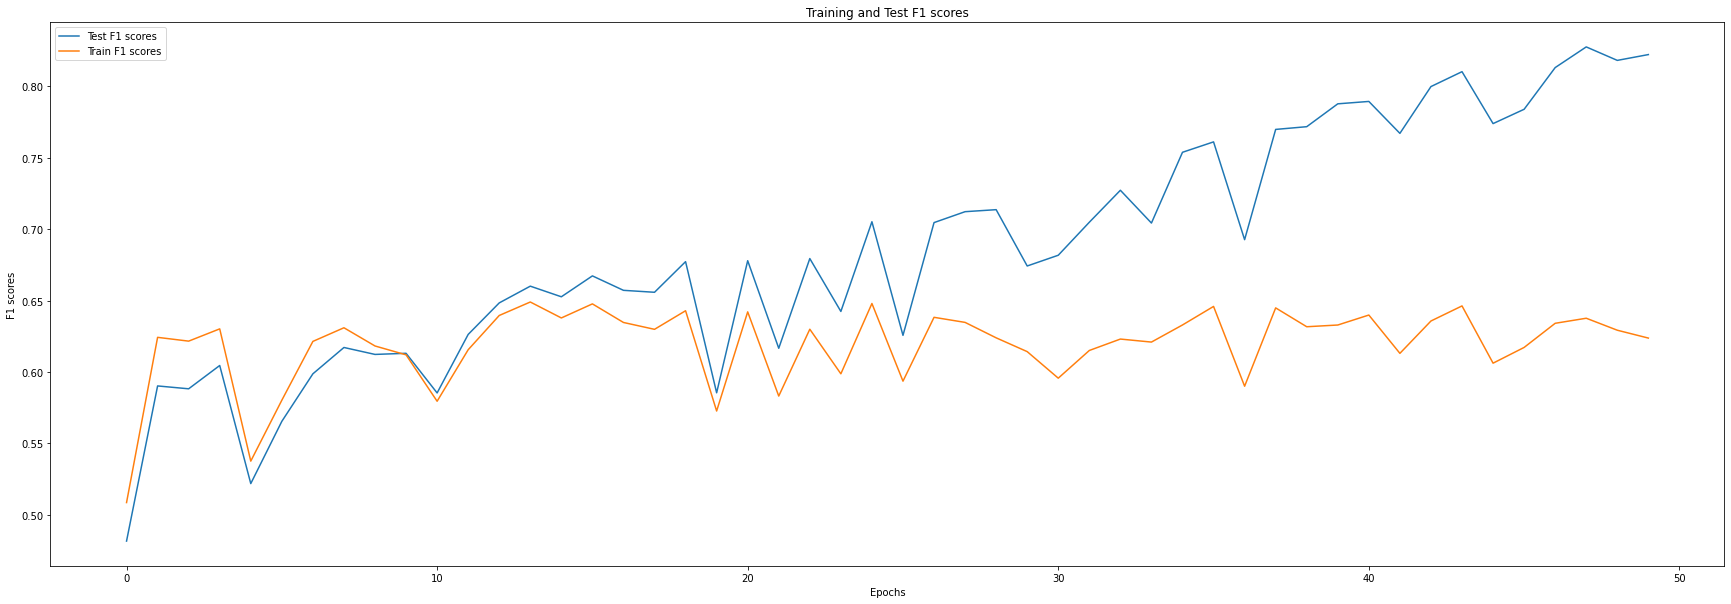

<Figure size 432x288 with 0 Axes>

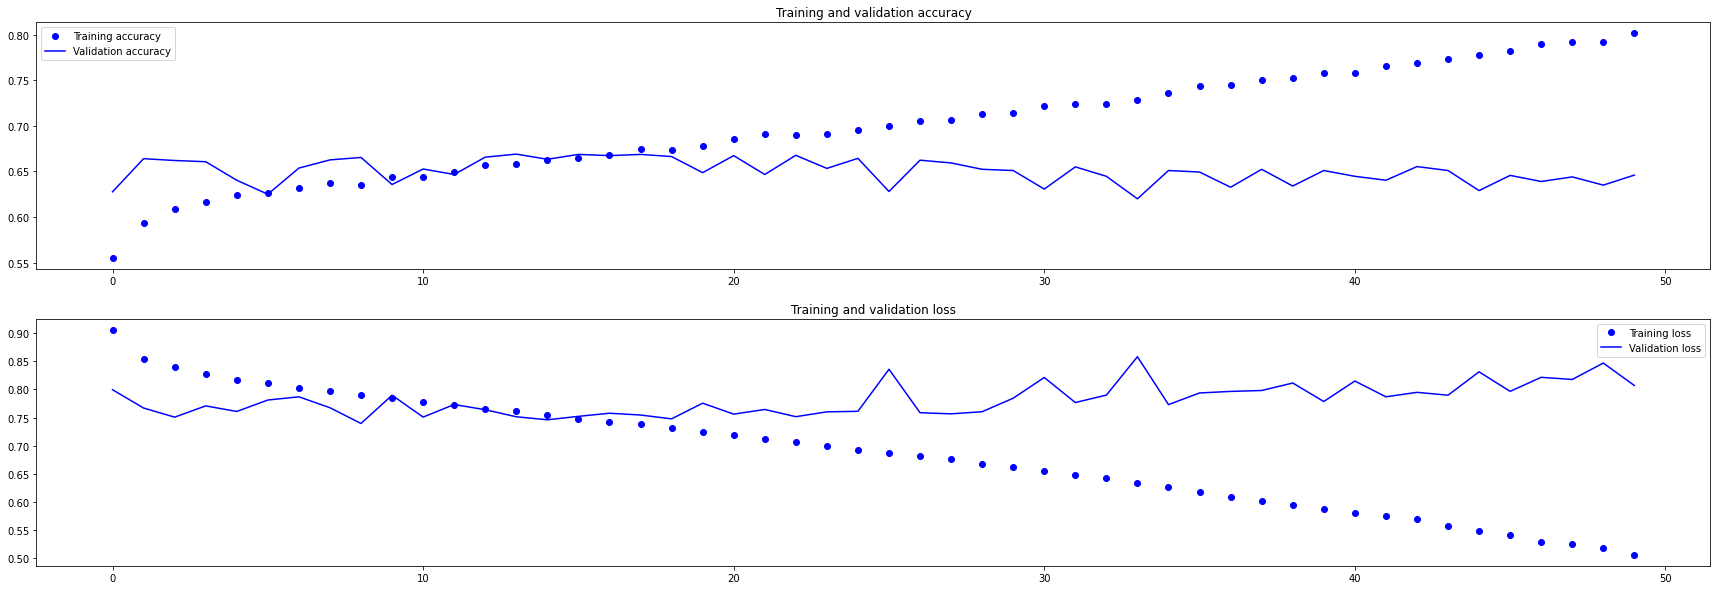

In [52]:
show_results()
show_results1(analysis)

In [53]:
print(max_f1_test, epoch_test)
print(max_f1_train, epoch_train)

0.6489834149394039 13
0.8275583430688883 47


In [54]:
f1scores_train = []
f1scores_test = []
max_f1_train = 0
max_f1_test = 0
epoch_train = 0
epoch_test = 0

LSTM

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
vocab_size = 10000
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [57]:
max_len = max([len(i.split()) for i in df.Tweet])

In [58]:
max_len

24

In [59]:
tokenizer = Tokenizer(oov_token = oov_tok)

In [60]:
# len(word_index)

In [61]:
training_sentences = df['Tweet'][:14000]
testing_sentences = df['Tweet'][14000:]
training_labels = df['Sentiment Polarity'][0:14000]
testing_labels = df['Sentiment Polarity'][14000:]

In [62]:
tokenizer.fit_on_texts(df['Tweet'])
word_index = tokenizer.word_index
print(len(word_index))

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

21612


In [63]:
print(len(training_sequences))
max_list = max(training_sequences, key = lambda i: len(i) )
print(max_list)
print(len(max_list))

14000
[18091, 5347, 115, 1489, 115, 5, 115, 1148, 115, 362, 115, 6768, 115, 1063, 115, 1394, 115, 41, 115, 1618, 115, 208, 115, 4073]
24


In [64]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(training_labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(training_labels)
testing_label_seq = np.array(label_tokenizer.texts_to_sequences(testing_labels))

print(label_seq)
print(label_word_index)

[[1], [1], [3], [2], [1], [2], [3], [1], [3], [1], [1], [1], [1], [2], [2], [2], [2], [3], [2], [3], [3], [2], [2], [1], [1], [3], [1], [1], [3], [2], [2], [2], [3], [2], [3], [1], [1], [1], [1], [1], [2], [3], [2], [1], [2], [1], [3], [2], [2], [2], [2], [3], [3], [3], [1], [2], [3], [1], [1], [1], [1], [3], [1], [1], [2], [2], [3], [2], [2], [1], [1], [1], [1], [1], [2], [2], [1], [2], [2], [1], [3], [2], [1], [1], [2], [1], [3], [1], [2], [3], [1], [2], [2], [3], [1], [2], [2], [2], [3], [2], [2], [3], [2], [2], [2], [1], [3], [2], [3], [1], [3], [2], [2], [1], [3], [1], [2], [3], [1], [1], [1], [2], [1], [1], [1], [1], [2], [3], [2], [1], [3], [1], [1], [1], [3], [2], [3], [1], [1], [1], [2], [1], [3], [3], [2], [1], [3], [3], [3], [3], [2], [1], [1], [2], [3], [1], [2], [3], [3], [1], [2], [3], [1], [3], [1], [2], [3], [3], [3], [2], [1], [3], [1], [3], [3], [1], [1], [1], [2], [2], [2], [3], [1], [1], [2], [1], [3], [2], [1], [3], [3], [3], [1], [1], [2], [1], [2], [2], [2], [2],

In [ ]:
# training_labels_onehot = tf.keras.utils.to_categorical(label_seq, num_classes = 3)

In [65]:
import numpy as np
# training_padded = np.array(training_padded)
# training_labels = np.array(training_labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
label_seq = np.array(label_seq)
testing_label_seq = np.array(testing_label_seq)

In [66]:
len(label_seq)

14000

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(21613, embedding_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 24, 16)            345808    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 75        
Total params: 346,291
Trainable params: 346,291
Non-trainable params: 0
_________________________________________________________________


In [68]:
num_epochs = 30
history = model.fit(training_padded, label_seq, epochs=1, validation_data=(testing_padded, testing_label_seq), verbose=2)

ValueError: in user code:

    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/aaryan/.local/lib/python3.9/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")